## Fourierova transformace
v modulu scipy

fft(signal)
- převádí signál z časové domény do frekvenční domény
- výstupem spektrum složené z komplexních čísel, která reprezentují amplitudy a fáze jednotlivých frekvencí
  - absolutní hodnota odpovídá amplitudě

ifft
- převádí signál z frekvenční domény zpět do časové domény
- výstupem časový průběh původního signálu

In [140]:
import matplotlib.pyplot as plt
def vizualizace(x, f, nazev, popisx):
    #frequencies = range(len(signal))
    # x je čas nebo frekvence


    # Vizualizace amplitud frekvencí
    amplitudes = abs(f)
    plt.plot(x, amplitudes, 'b-')
    plt.plot(x, f.real, 'm--')
    plt.plot(x, f.imag, 'c--')
    plt.xlabel(popisx)
    plt.ylabel('Amplituda')
    plt.title(nazev)
    plt.legend(('amplitudes', 'real', 'imaginary'))

    plt.show()

In [135]:
from scipy.fft import fft
signal = [1, 2, 3, 4]
transformed = fft(signal)

print(signal)
print(transformed)

[1, 2, 3, 4]
[10.-0.j -2.+2.j -2.-0.j -2.-2.j]


Vizualizace signálu ve frekvenční doméně

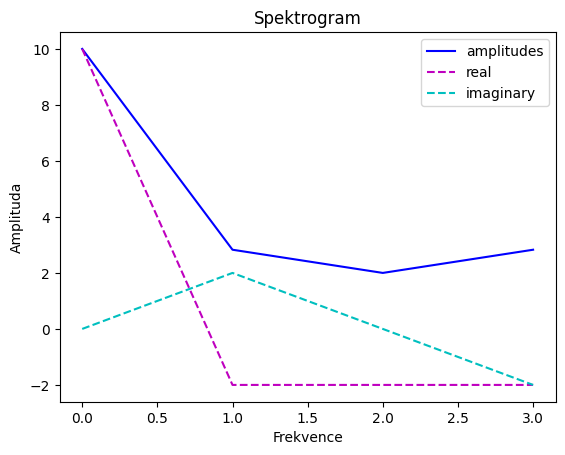

In [136]:
vizualizace(range(len(signal)), transformed, "Spektrogram", "Frekvence")

Inverzní FFT

In [137]:
from scipy.fft import ifft
s = ifft(transformed)         # scipy.fft.ifft


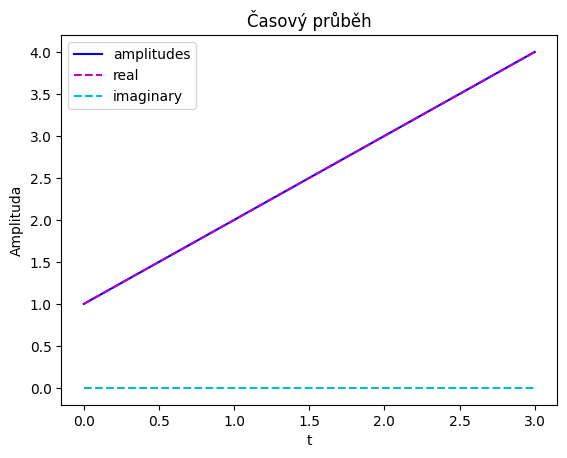

In [138]:
vizualizace(range(len(signal)), s, "Časový průběh", "t")

In [154]:
# sinusoida
import numpy as np
from scipy.fft import fft, ifft

t = np.linspace(0, 1, 1000)                     # Časový rozsah (rozlišení 1 ms)
omega = 2 * np.pi * 5                           # Frekvence v Hz (5 Hz)
signal = np.sin(omega * t)                      # Generování signálu

transformed_signal = fft(signal)                # Provedení FFT
restored_signal = ifft(transformed_signal).real # IFFT k obnovení původního signálu

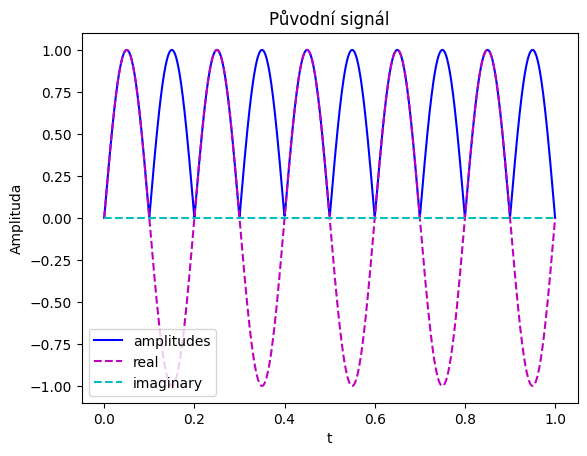

In [155]:
vizualizace(t, signal, "Původní signál", "t")

np.fft.fftfreq(počet_vzorků, perioda_vzorkování)
- vrací pole frekvencí odpovídajících výstupu funkce fft()
- jaké frekvence jsou reprezentovány v transformovaném signálu

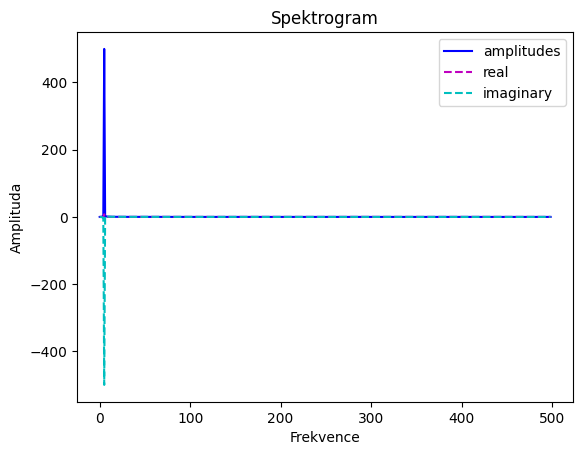

In [148]:
freqs = np.fft.fftfreq(len(t), d=t[1]-t[0])
#vizualizace(freqs, transformed_signal, "Spektrogram", "Frekvence")
amplitudes = transformed_signal     # abs()
displ_freqs = freqs[:len(freqs)//2]
displ_ampls = amplitudes[:len(amplitudes)//2]
vizualizace(displ_freqs, displ_ampls, "Spektrogram", "Frekvence")

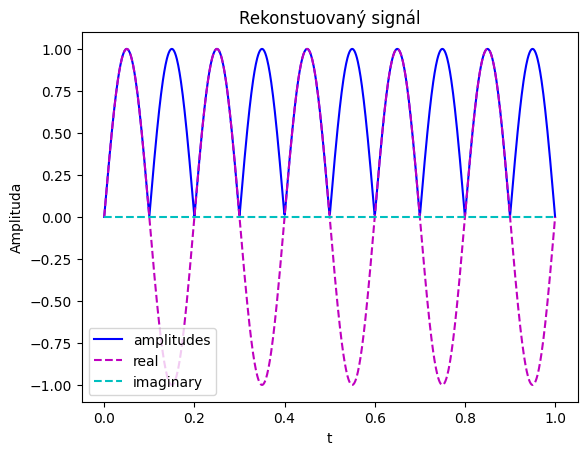

In [149]:
vizualizace(t, restored_signal, "Rekonstuovaný signál", "t")

In [ ]:
import numpy as np
from scipy.fft import fft, ifft

Možno zadat jakýkoliv signál

In [180]:
t = np.linspace(0, 1, 1000)                     # Časový rozsah (rozlišení 1 ms)
omega = 2 * np.pi * 5                           # Frekvence v Hz (5 Hz)
signal = np.sin(omega * t)                      # Generování signálu

In [213]:
#t = np.arange(400)
count = len(t)
rng = np.random.default_rng()
signal = np.zeros((count,), dtype=complex)
od = int(0.1*count)
do = int(0.15*count)
signal[od:do] = np.exp(1j*rng.uniform(0, 2*np.pi, (do-od,)))

In [205]:
signal = np.sin(50.0 * 2.0*np.pi*t) + 0.5*np.sin(80.0 * 2.0*np.pi*t)

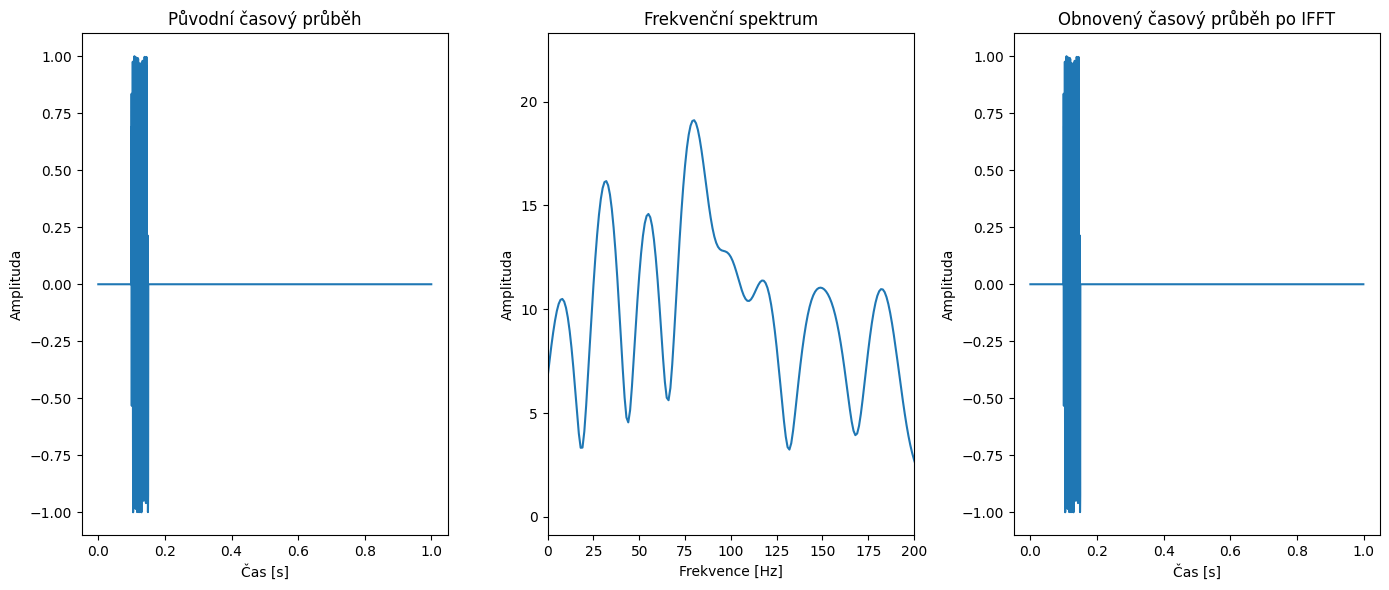

In [214]:
transformed_signal = fft(signal)                # Provedení FFT
restored_signal = ifft(transformed_signal).real # IFFT k obnovení původního signálu
freqs = np.fft.fftfreq(len(t), d=t[1]-t[0])
amplitudes = abs(transformed_signal)     # abs()

# Vizualizace výsledků přehledně
plt.figure(figsize=(14,6))

plt.subplot(131)
plt.plot(t, signal)
plt.title('Původní časový průběh')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')

plt.subplot(132)
#plt.stem(freqs[:len(freqs)//2], amplitudes[:len(amplitudes)//2])
plt.plot(freqs[:len(freqs)//2], amplitudes[:len(amplitudes)//2])
plt.title('Frekvenční spektrum')
plt.xlabel('Frekvence [Hz]')
plt.ylabel('Amplituda')
plt.xlim(0, 200)


plt.subplot(133)
plt.plot(t, restored_signal)
plt.title('Obnovený časový průběh po IFFT')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')

plt.tight_layout()
plt.show()

Jak vypadají jednotlivá pole?

In [ ]:
import numpy as np
from scipy.fft import fft, fftfreq

N = 60           # Počet vzorků
Ts = 1.0 / 500.0  # Perioda vzorkování (odpovídá vzorkovací frekvenci 500 Hz)
x = np.linspace(0.0, N*Ts, N, endpoint=False)  # Časová osa
y = np.sin(50.0 * 2.0 * np.pi * x)         # Signál s frekvencí 50 Hz

# Výpočet FFT a frekvencí
yf = fft(y)                              # FFT signálu
# komplexní pole, které reprezentuje amplitudu a fázi různých frekvenčních složek
xf = fftfreq(N, Ts)                       # Frekvenční osa (celkem vzorlů, krok)

# výpis
np.set_printoptions(precision=2)
print("Frekvence, v rozmezí od 0 do fs/2 (kladné frekvence) a od -fs/2 zpět do 0 (záporné frekvence)")
print(xf)
print("Komplexní pole amplitud (prvních 6 hodnot)")
print(yf[:6])

# Omezení na kladné frekvence - obě pole vezmeme od 0 do n/2
xf = xf[:N//2]                          # Kladné frekvence
yf = 2.0 / N * np.abs(yf[:N//2])        # Normalizace amplitudy
# abs. hodnota reprezentuje amplitudy jednotlivých frekvencí

# výpis
print("\nNezáporné frekvence")
print(xf)
print("Pole amplitud")
print(yf)
np.set_printoptions(precision=10)


Frekvence, v rozmezí od 0 do fs/2 (kladné frekvence) a od -fs/2 zpět do 0 (záporné frekvence)
[   0.      8.33   16.67   25.     33.33   41.67   50.     58.33   66.67
   75.     83.33   91.67  100.    108.33  116.67  125.    133.33  141.67
  150.    158.33  166.67  175.    183.33  191.67  200.    208.33  216.67
  225.    233.33  241.67 -250.   -241.67 -233.33 -225.   -216.67 -208.33
 -200.   -191.67 -183.33 -175.   -166.67 -158.33 -150.   -141.67 -133.33
 -125.   -116.67 -108.33 -100.    -91.67  -83.33  -75.    -66.67  -58.33
  -50.    -41.67  -33.33  -25.    -16.67   -8.33]
Komplexní pole amplitud (prvních 6 hodnot)
[-1.68e-15-0.00e+00j  1.68e-14+7.50e-15j -1.58e-14+1.03e-14j
 -3.42e-15-7.73e-15j  3.91e-15-4.05e-15j -2.66e-15-4.55e-15j]

Nezáporné frekvence
[  0.     8.33  16.67  25.    33.33  41.67  50.    58.33  66.67  75.
  83.33  91.67 100.   108.33 116.67 125.   133.33 141.67 150.   158.33
 166.67 175.   183.33 191.67 200.   208.33 216.67 225.   233.33 241.67]
Pole amplitud
[5.59

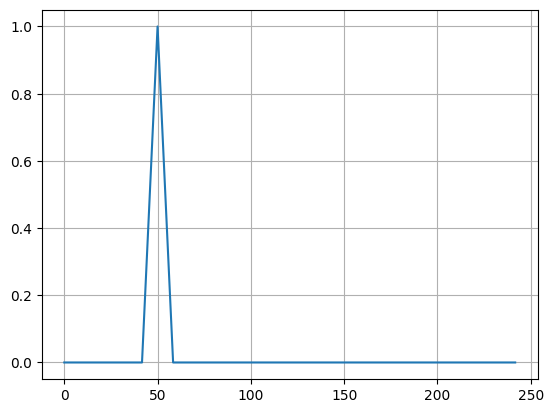

In [22]:
import matplotlib.pyplot as plt
plt.plot(xf, yf)                         # Graf amplitudového spektra
plt.grid()
plt.show()


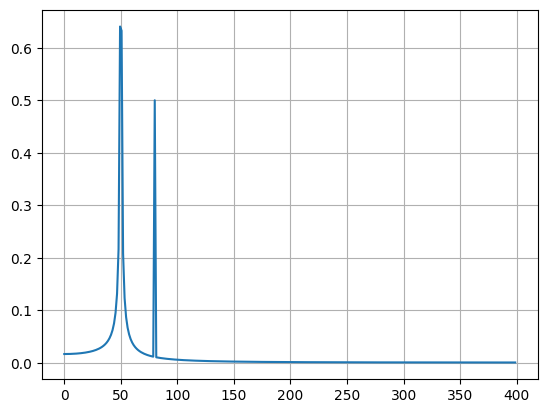

In [ ]:
import numpy as np
from scipy.fft import fft, fftfreq
N = 600                         # počet vzorků
Ts = 1.0 / 800.0                # perioda vzorkování
x = np.linspace(0.0, N*Ts, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)                     # 1D diskrétní FFT
xf = fftfreq(N, Ts)[:N//2]      # frekvence FFT

import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

### Fourierova transformace - příklad

Možno řešit pomocí knihovny NumPy nebo SciPy

In [ ]:
import numpy as np
from numpy.fft import fft, ifft         # pomalejší

In [39]:
import numpy as np
from scipy.fftpack import fft, ifft     # rychlejší

Příprava signálu (v poli x)

In [291]:
Tc = 1                          # celkový čas [s]
fs = 2000                       # vzorkovací frekvence (sampling rate, Hz) - pozor na aliasing 
Ts = 1/fs                       # perioda vzorkování (sampling interval, s)
N = Tc*fs                       # celkový počet vzorků
print(N)

t = np.arange(0, Tc, Ts)        # časová osa od 0 do t_span [0.0 až 0.995 s]
print(len(t), t[-1])
#t = np.linspace(0, Tc, N)      # časová osa od 0 do t_span [0.0 až 1.0 s]
#print(len(t), t[-1])

2000
2000 0.9995


Signál 1

In [292]:
u1 = 3 * np.sin(2*np.pi*1*t)                    # frekvence 1
u2 = 0
u3 = np.sin(2*np.pi*4*t)                        # frekvence 4
u4 = 0
u5 = 0
u6 = 0
u7 = 0.5 * np.sin(2*np.pi*7*t)                  # frekvence 7

x = u1 + u2 + u3 + u4 + u5 + u6 + u7

Signál 2 (trojúhelník)

In [ ]:
pi2 = np.pi/2
u1 = 0.81   * np.cos(2*np.pi*1*t - pi2)        # frekvence 1    8./pi/pi
u2 = 0
u3 = 0.09   * np.cos(2*np.pi*3*t + pi2)        # frekvence 3    8./3/3/pi/pi
u4 = 0
u5 = 0.0324 * np.cos(2*np.pi*5*t - pi2)        # frekvence 5    8./5/5/pi/pi
u6 = 0
u7 = 0.0165 * np.cos(2*np.pi*7*t + pi2)        # frekvence 7    8./7/7/pi/pi

x = u1 + u2 + u3 + u4 + u5 + u6 + u7

Signál 3 (delta funkce)

In [288]:
u1 = u2 = u3 = u4 = u5 = u6 = u7 = 0
x = np.zeros(N, dtype=np.ndarray)
x[100] = 10

Vykreslení zvoleného signálu

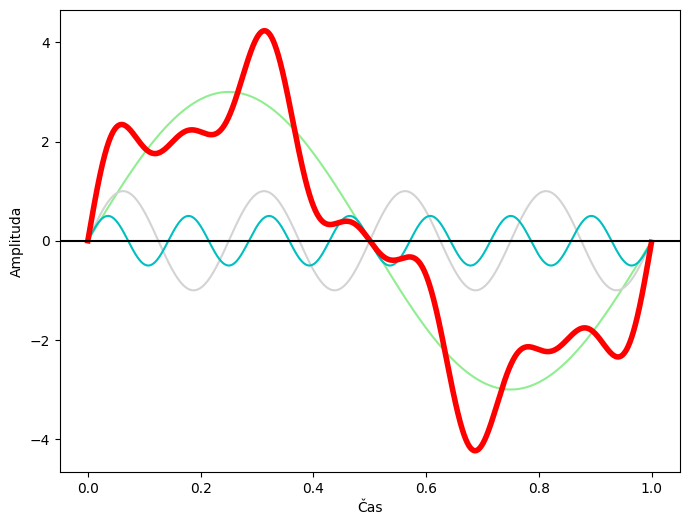

In [293]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))
if type(u1) == np.ndarray: plt.plot(t, u1, color = 'lightgreen')
if type(u2) == np.ndarray: plt.plot(t, u2, 'b')
if type(u3) == np.ndarray: plt.plot(t, u3, color = 'lightgray')
if type(u4) == np.ndarray: plt.plot(t, u4, 'm')
if type(u5) == np.ndarray: plt.plot(t, u5, 'y')
if type(u6) == np.ndarray: plt.plot(t, u6, 'p')
if type(u7) == np.ndarray: plt.plot(t, u7, 'c')
plt.plot(t, x, 'r', linewidth = 4)

plt.axhline(y = 0, color='k')               # vykreslení osy x (osa y axvline)
plt.xlabel('Čas')
plt.ylabel('Amplituda')

plt.show()

FFT a inverzní FFT

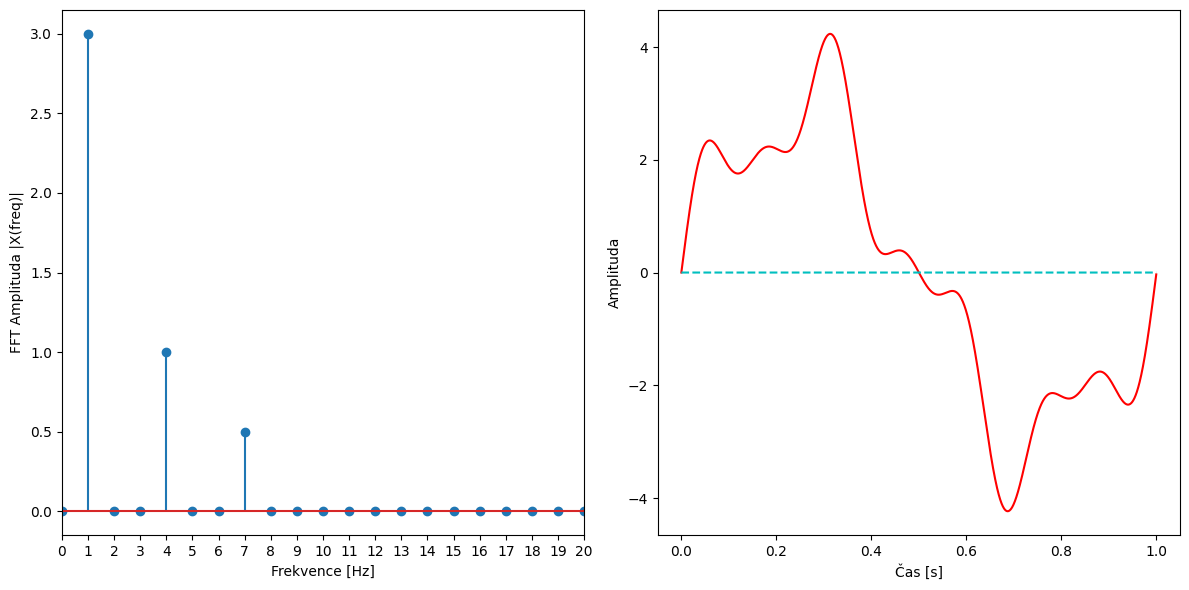

In [294]:
def frekvence1():
    global freq, Xc
    ts = np.arange(N)                   # jednotlivé časy [0 až 1999]
    #Tc = N/fs                          # celkový čas [1.0]   (fs vzorkovací frekvence)
    freq = ts/Tc 
    Xc = 2.0 / N * np.abs(X)            # normované amplitudy

def frekvence2():
    global freq, Xc
    freq = fftfreq(N, Ts)               # Frekvenční osa (celkem vzorků, perioda vzorkování)

    # Omezení na kladné frekvence - obě pole vezmeme od 0 do n/2
    freq = freq[:N//2]                  # Kladné frekvence
    Xc = 2.0 / N * np.abs(X[:N//2])     # Normalizace amplitudy

X = fft(x)                              # FFT, x z předch. příkladu
#N = len(X)  # příp. N = fs*Tc         # Počet vzorků (2000)

frekvence2()

# Vizualizace
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.stem(freq, np.abs(Xc))              # stem
plt.xlabel('Frekvence [Hz]')
plt.ylabel('FFT Amplituda |X(freq)|')

# Nastavení osy x na přirozená čísla
plt.xticks(range(21))  # Explicitně nastavíme značky na ose x
plt.xlim(0, 20)                         # nastaví meze osy x

plt.subplot(122)
plt.plot(t, ifft(X).real, 'r')          # inverzní FFT (real jen kvůli zaokrouhlovacím chybám)
plt.plot(t, ifft(X).imag, 'c--')        # jen pro kontrolu
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.tight_layout()                      # jen kvůli rozložení grafů do obrázku
plt.show()

## Zpracování signálu

In [ ]:
# balíček ke stahování a správě datasetů SciPy; nutno restartovat python
%pip install pooch

Typ:   <class 'numpy.ndarray'>
Length 768
Shape: (768, 1024, 3)
dtype: uint8
Max:   255

Typ:   <class 'numpy.ndarray'>
Length 768
Shape: (768, 1024)
dtype: float32
Max:   250.0


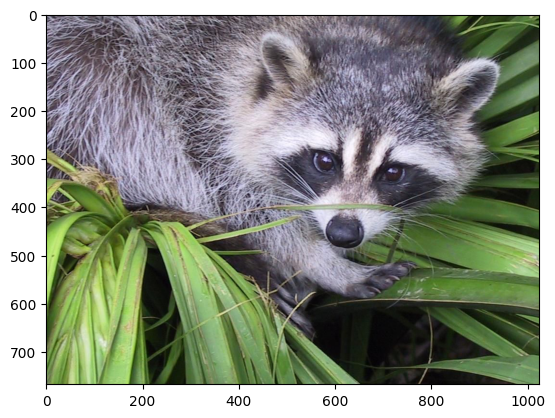

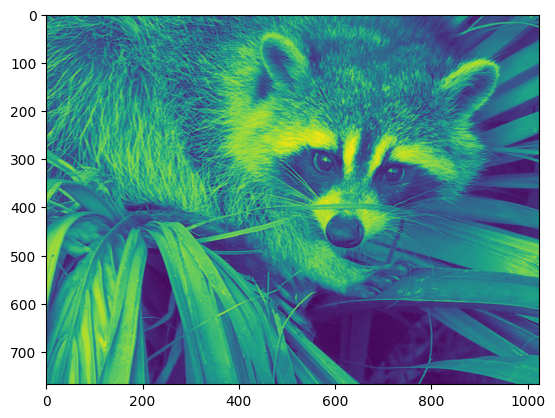

In [304]:
from scipy import signal, datasets      # pův. misc
import matplotlib.pyplot as plt
import numpy
face = datasets.face()                  # obrázek mývala 1024 x 768
print("Typ:  ", type(face))
print("Length", len(face))
print("Shape:", face.shape)
print("dtype:", face.dtype)
print("Max:  ", face.max())

image = datasets.face(gray=True).astype(numpy.float32)
print()
print("Typ:  ", type(image))
print("Length", len(image))
print("Shape:", image.shape)
print("dtype:", image.dtype)
print("Max:  ", image.max())

plt.figure()
plt.imshow(face)                    # vykreslení pole image
plt.show()
plt.imshow(image)                   # vykreslení pole image (stamdardně nastaveno colormap)
#plt.imshow(image, cmap='jet')       # viridis, jet, gray, ...
plt.show()

separabilní konvoluce 2D signálu s 2D jádrem
- prováděno odděleně podle jednotlivých dimenzí
    - jádro se rozloží na dvě separabilní jádra (jedno pro každou dimenzi) 
    - provede se konvoluce s těmito jádry postupně podél každé dimenze
- snížení výpočetní náročnosti 

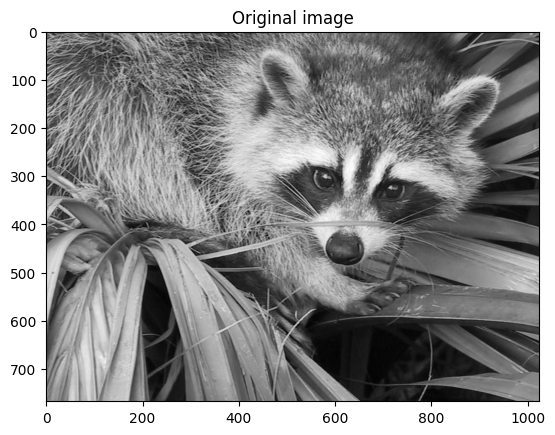

In [2]:
plt.figure()                                # nový obrázek
plt.imshow(image)                           # vykreslení pole image
plt.gray()                                  # šedá
plt.title('Original image')                 # nadpis
plt.show()

In [3]:
ck = signal.cspline2d(image, 8.0)                                               # 2D spline
derfilt = numpy.array([1.0, -2, 1.0], dtype=numpy.float32)
print(derfilt)
deriv = (signal.sepfir2d(ck, derfilt, [1]) + signal.sepfir2d(ck, [1], derfilt)) # konvoluce (2D FIR)

[ 1. -2.  1.]


In [4]:
laplacian = numpy.array([[0,1,0], [1,-4,1], [0,1,0]], dtype=numpy.float32)      # jádro konvoluce
deriv2 = signal.convolve2d(ck,laplacian,mode='same',boundary='symm')            # konvoluce

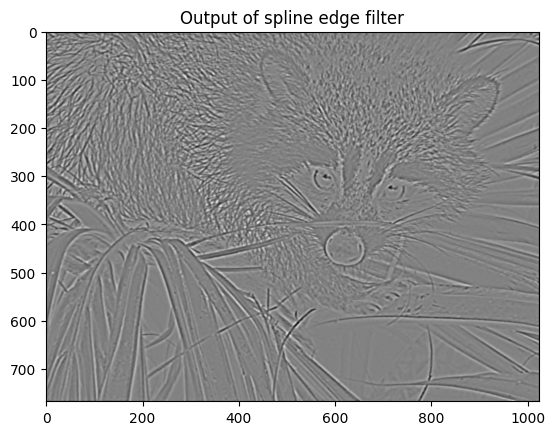

In [5]:
plt.figure()
plt.imshow(deriv)                          # vykreslení pole deriv2
plt.gray()
plt.title('Output of spline edge filter')
plt.show()

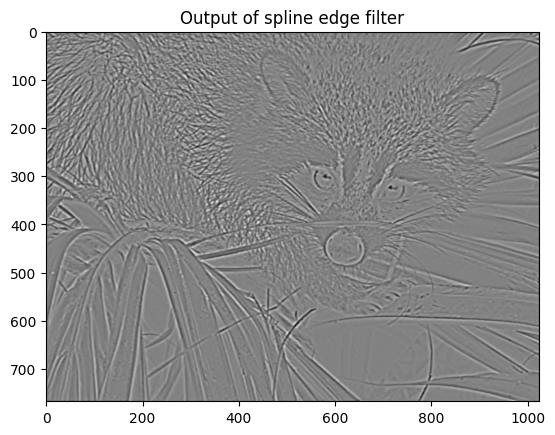

In [6]:
plt.figure()
plt.imshow(deriv2)                          # vykreslení pole deriv2
plt.gray()
plt.title('Output of spline edge filter')
plt.show()

## Uložení a načtení pole a obrázku 

Pillow 
- základní úpravy obrázků

imageio 
- široká podpora formátů, méně funkcí

OpenCV
- nejrychlejší a nejvýkonnější pro zpracování obrazu a počítačové vidění

In [ ]:
%pip install pillow
%pip install imgio
%pip install opencv-python

Uložení do souboru

In [334]:
from scipy import datasets
from PIL import Image
print("Předdefinované pole:", type(datasets.face()))
im = Image.fromarray(datasets.face())                       # převod pole na obrázek
print("Obrázek z pole:", type(im))

im.save("tmp/myval.jpg")                                    # uložení obrázku

import matplotlib.image
matplotlib.image.imsave('tmp/myval2.jpg', datasets.face())  # uložení pole jako obr.

Předdefinované pole: <class 'numpy.ndarray'>
Obrázek z pole: <class 'PIL.Image.Image'>


Načtení ze souboru

Typ (PIL): <class 'PIL.JpegImagePlugin.JpegImageFile'>
Typ (IIO): <class 'numpy.ndarray'>
Typ (CV2): <class 'numpy.ndarray'>
Formát (PIL):  JPEG RGB
Shape  (IIO):  (768, 1024, 3)
Shape  (CV2):  (768, 1024, 3)


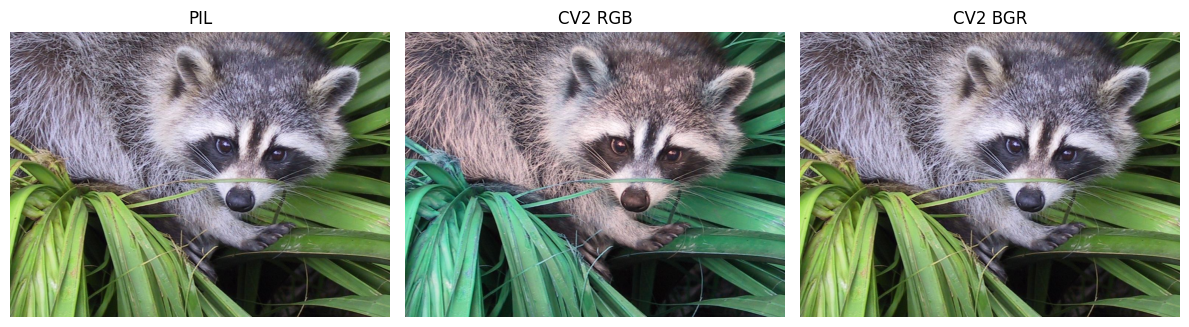

In [335]:
import matplotlib.pyplot as plt
from PIL import Image
import imageio.v3 as iio
import cv2

im2 = Image.open('tmp/myval.jpg')              # načtení obrázku pomocí PIL
im3 = iio.imread('tmp/myval.jpg')              # načtení obrázku jako pole pomocí imageio
im4 = cv2.imread("tmp/myval.jpg")              # načtení obrázku jako pole pomocí cv2

print("Typ (PIL):", type(im2))
print("Typ (IIO):", type(im3))
print("Typ (CV2):", type(im4))
print("Formát (PIL): ", im2.format, im2.mode)
print("Shape  (IIO): ", im3.shape)
print("Shape  (CV2): ", im4.shape)

plt.figure(figsize = (12, 6))
plt.subplot(131)
plt.imshow(im2)
#plt.imshow(im3)                                # funguje stejně
plt.axis('off')
plt.title("PIL")

plt.subplot(132)
plt.imshow(im4)
plt.axis('off')
plt.title("CV2 RGB")

plt.subplot(133)
img_cv_rgb = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
plt.imshow(img_cv_rgb)
plt.axis('off')
plt.title("CV2 BGR")

plt.tight_layout()
plt.show()

#im2.show()                                     # otevření v přidružené aplikaci

Přístup k barevným kanálům (poslední index matice)

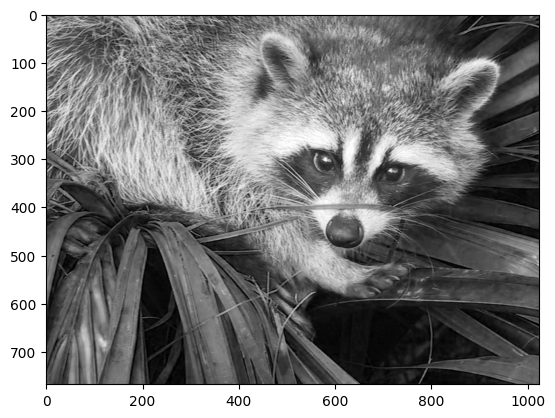

In [340]:
img = im3                       # ve formě pole
R = img[:, :, 0]
G = img[..., 1]                 # jiný zápis přes tři tečky
B = img[..., 2]                 # nebo -1
plt.imshow(B, cmap='gray');     # modrý kanál čb. (výchozí se nehodí)

Načtení a převod na stupně šedé

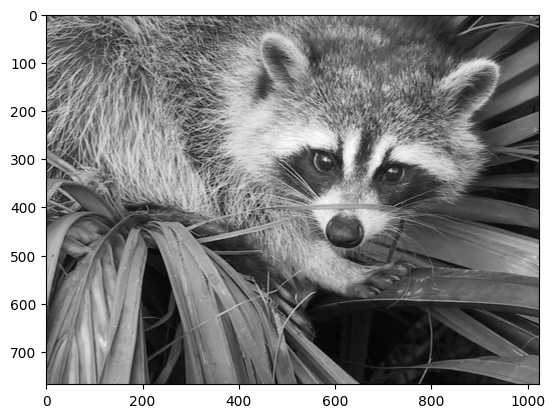

In [339]:
import imageio.v3 as iio
import numpy as np
# Načtení obrázku
imgbw = iio.imread("tmp/myval.jpg")

# Pokud obrázek není ve stupních šedi, převedeme ho
if len(imgbw.shape) == 3:
    imgbw = np.mean(imgbw, axis=2)  # průměrujeme přes RGB kanály (!)
plt.imshow(imgbw, "gray");

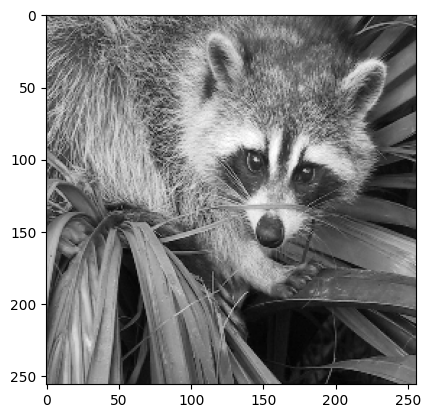

In [344]:
import cv2  # OpenCV pro načítání obrázku
# Načtení obrázku a konverze do odstínů šedi
imgbw2 = cv2.imread("tmp/myval.jpg", cv2.IMREAD_GRAYSCALE)     # načte obrázek
imgbw2 = cv2.resize(imgbw, (256, 256))                         # přizpůsobí velikost
plt.imshow(imgbw2, cmap="gray")
plt.show()

## 2D Fourierova transformace

Aplikace Fourierovy transformace na obrázek

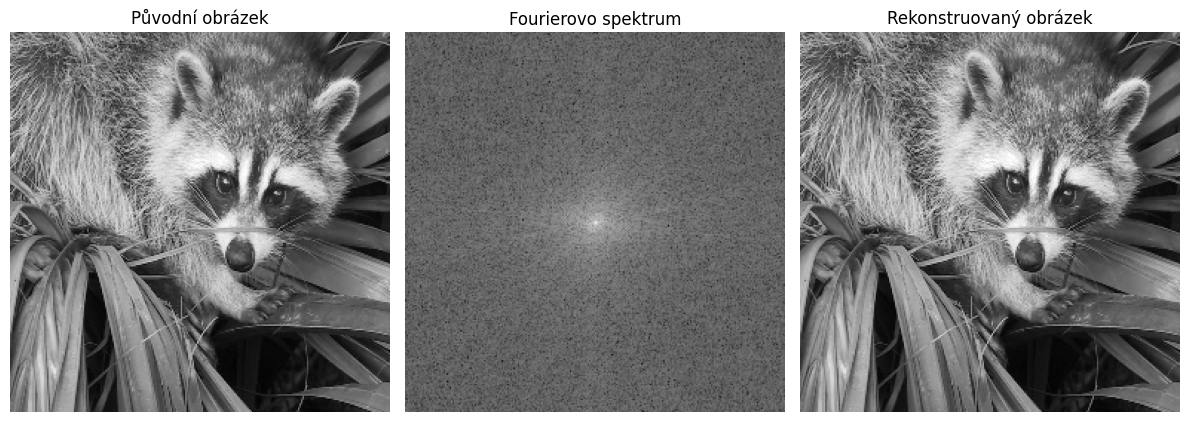

In [345]:
# Fourierova transformace pomocí NumPy
import numpy as np
import matplotlib.pyplot as plt


img = imgbw2
# 2D Fourierova transformace obrázku
f_transform = np.fft.fft2(img)

# Posunutí nulové frekvence do středu (vizualizace)
f_transform_shifted = np.fft.fftshift(f_transform)

# Magnituda spektra (pro vizualizaci) - logaritmické měřítko
magnitude_spectrum = np.log(np.abs(f_transform_shifted))   # *20

# Inverzní Fourierova transformace (po rekonstrukci obrazu)
f_ishift = np.fft.ifftshift(f_transform_shifted)
img_reconstructed = np.fft.ifft2(f_ishift).real

# Vizualizace
plt.figure(figsize=(12, 6))

# Zobrazení původního obrázku
plt.subplot(1, 3, 1)                # 1 řádek, 3 sloupce, první
plt.title("Původní obrázek")
plt.imshow(img, cmap="gray")
plt.axis("off")

# Zobrazení magnitude spektra
plt.subplot(1, 3, 2)                # 1 řádek, 3 sloupce, druhý
plt.title("Fourierovo spektrum")
plt.imshow(magnitude_spectrum, cmap="gray")
plt.axis("off")

# Zobrazení rekonstruovaného obrázku
plt.subplot(1, 3, 3)                # 1 řádek, 3 sloupce, třetí
plt.title("Rekonstruovaný obrázek")
plt.imshow(img_reconstructed, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


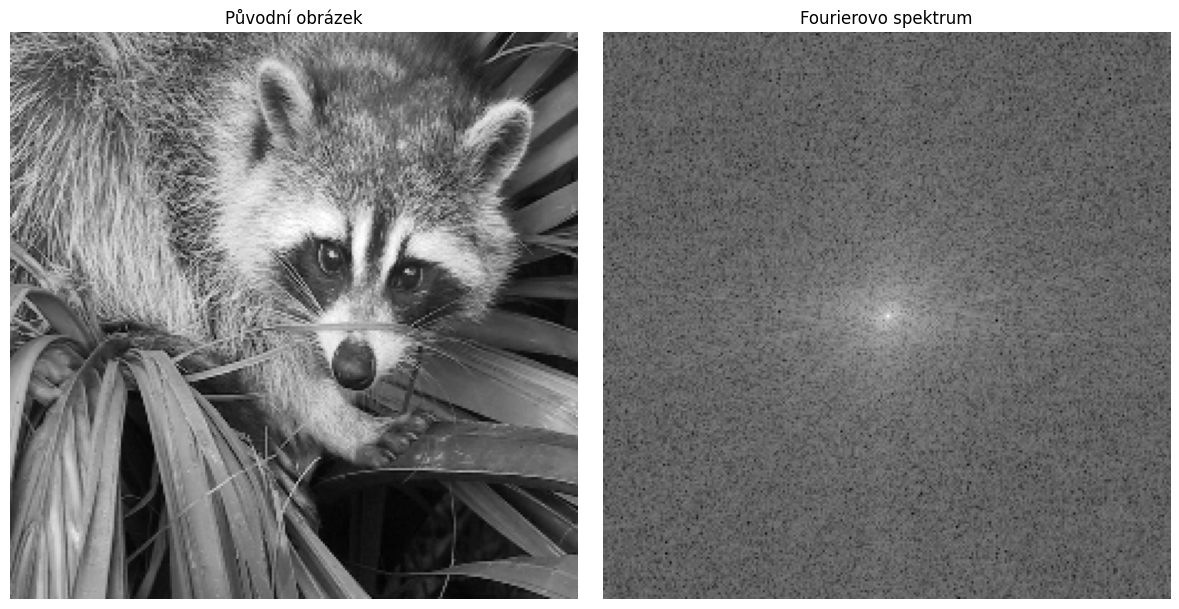

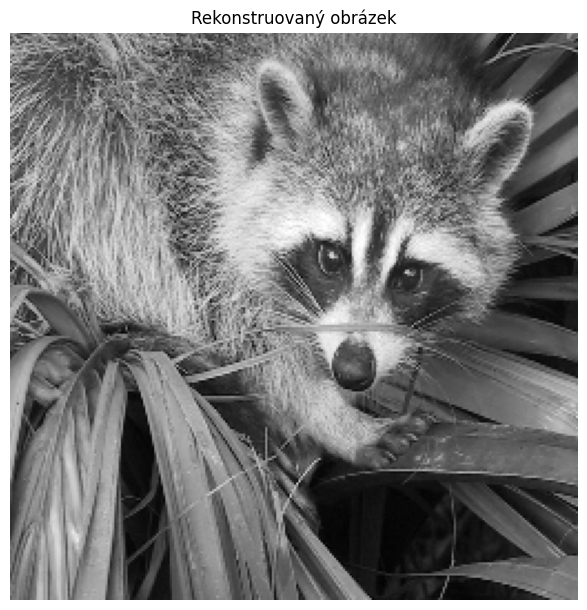

In [346]:
# Fourierova transformace pomocí SciPy
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

img = imgbw2
# 2D Fourierova transformace obrázku
f_transform = fft2(img)

# Posunutí nulové frekvence do středu (vizualizace)
f_transform_shifted = fftshift(f_transform)

# Magnituda spektra (pro vizualizaci) - logaritmické měřítko
magnitude_spectrum = np.abs(f_transform_shifted)

# Inverzní Fourierova transformace (po rekonstrukci obrazu)
img_reconstructed = np.abs(ifft2(f_transform))


# Vizualizace
plt.figure(figsize=(12, 6))

# Zobrazení původního obrázku
plt.subplot(1, 2, 1)            # 1 řádek, 2 sloupce, první
plt.imshow(img, cmap='gray')
plt.title("Původní obrázek")
plt.axis('off')

# Zobrazení magnitude spektra
plt.subplot(1, 2, 2)            # 1 řádek, 2 sloupce, druhý
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')  # log pro lepší vizualizaci
plt.title("Fourierovo spektrum")
plt.axis('off')

plt.tight_layout()
plt.show()

# Zobrazení rekonstruovaného obrázku (nový obr.)
plt.figure(figsize=(6.2, 6.2))
plt.imshow(img_reconstructed, cmap='gray')
plt.title("Rekonstruovaný obrázek")
plt.axis('off')
plt.tight_layout()
plt.show()


Vytvoření low-pass filtru

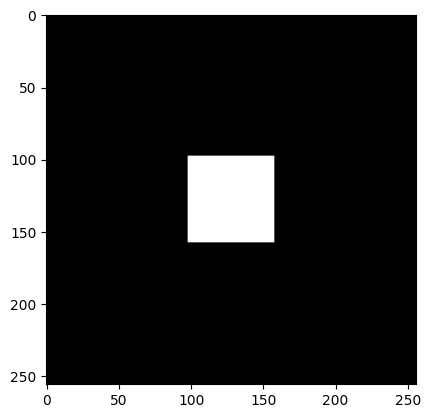

In [347]:
# Vytvoření low-pass filtru
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2  # Střed obrázku (nulová frekvence)

# Velikost okna pro low-pass filtr (poloměr, kolik frekvencí necháme projít)
radius = 30     # default 30

# Vytvoříme masku (low-pass filtr)
mask = np.zeros((rows, cols))
mask[crow - radius:crow + radius, ccol - radius:ccol + radius] = 1
plt.imshow(mask, cmap="gray")
plt.show()

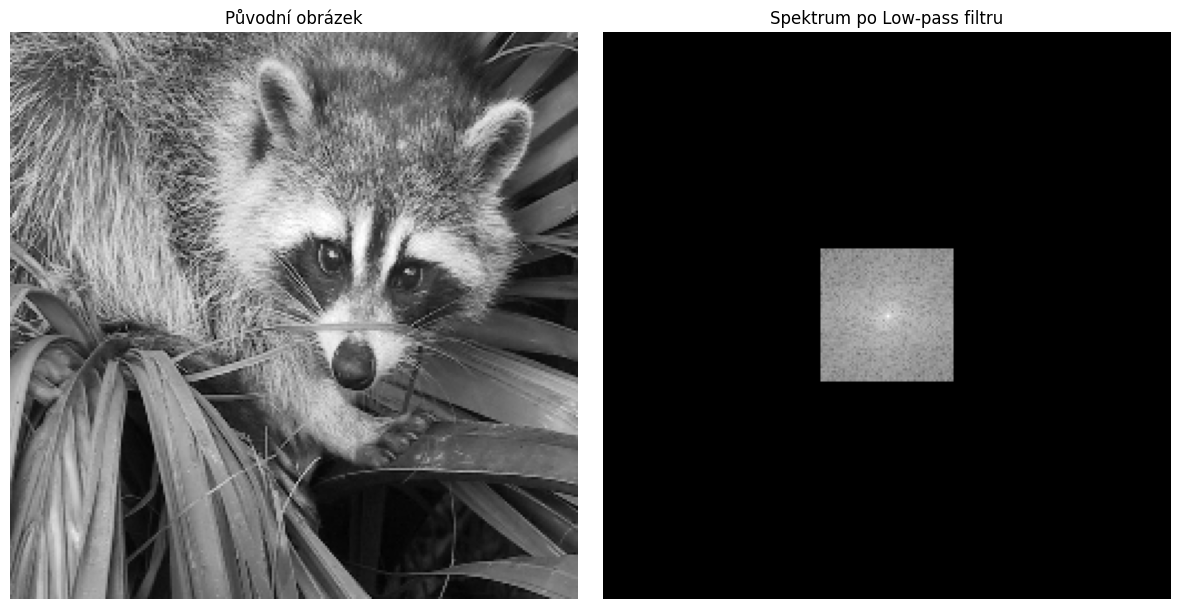

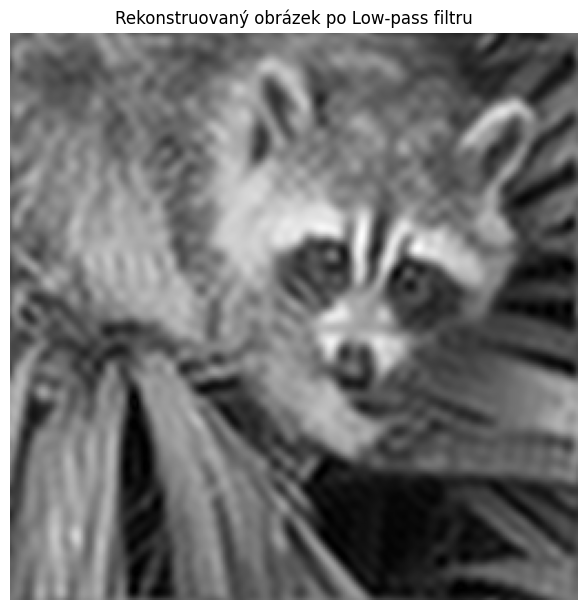

In [349]:
# Fourierova transformace a low-pass filtr pomocí SciPy
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

img = imgbw2
# 2D Fourierova transformace obrázku
f_transform = fft2(img)

# Posunutí nulové frekvence do středu (vizualizace)
f_transform_shifted = fftshift(f_transform)

# * * * * Aplikace masky na spektrum   * * * * * * *
# low-pass filtr
f_transform_filtered = f_transform_shifted * mask
# high-pass filtr
#f_transform_filtered = f_transform_shifted * (1-mask)

# Inverzní Fourierova transformace pro rekonstruování obrázku
img_reconstructed_filtered = np.abs(ifft2(np.fft.ifftshift(f_transform_filtered)))


# Vizualizace
plt.figure(figsize=(12, 6))

# Zobrazení původního obrázku
plt.subplot(1, 2, 1)                # 1 řádek, 2 sloupce, první
plt.imshow(img, cmap='gray')
plt.title("Původní obrázek")
plt.axis('off')

# Zobrazení spektra po aplikaci low-pass filtru
magnitude_spectrum_filtered = np.abs(f_transform_filtered)
plt.subplot(1, 2, 2)                # 1 řádek, 2 sloupce, druhý
plt.imshow(np.log(magnitude_spectrum_filtered + 1), cmap='gray')
plt.title("Spektrum po Low-pass filtru")
plt.axis('off')

plt.tight_layout()
plt.show()

# Zobrazení rekonstruovaného obrázku po aplikaci filtru
plt.figure(figsize=(6.2, 6.2))
plt.imshow(img_reconstructed_filtered, cmap='gray')
plt.title("Rekonstruovaný obrázek po Low-pass filtru")
plt.axis('off')
plt.tight_layout()
plt.show()


## 2D Waveletová transformace

In [ ]:
%pip install pywavelets

#### dwt2
Jeden krok DWT rozkladu – rozdělí obrázek na čtyři sub-pásma (LL, LH, HL, HH) pro jednu úroveň
#### wavedec2
Víceúrovňový DWT rozklad – opakuje dwt2 na nízkofrekvenční složce (LL) až do zadané úrovně

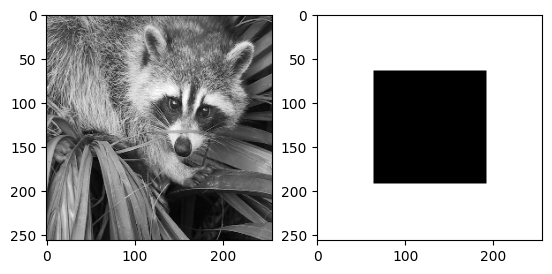

In [351]:
import numpy as np
import matplotlib.pyplot as plt

# Načtení obrázku
img1 = imgbw2

# Načtení testovacího obrazu
img2 = np.ones((256, 256))
img2[64:192, 64:192] = 0

plt.subplot(1, 2, 1)            # 1 řádek, 2 sloupce, první
plt.imshow(img1, cmap="gray")
plt.subplot(1, 2, 2)            # 1 řádek, 2 sloupce, druhý
plt.imshow(img2, cmap="gray")
plt.show()

### Jednoúrovňová DWT
#### DWT2 - 2D diskrétní waveletová transformace

(cA, (cH, cV, cD))  n-tice

- cA Aproximace             - Low-low (LL) - nízké frekvence
- cH horizontální detaily   - High-low (HL) - horizontální detaily
- cV svislé detaily         - Low-high (LH) - vertikální detaily
- cD diagonální detaily     - High-high (HH) - vysoké frekvence

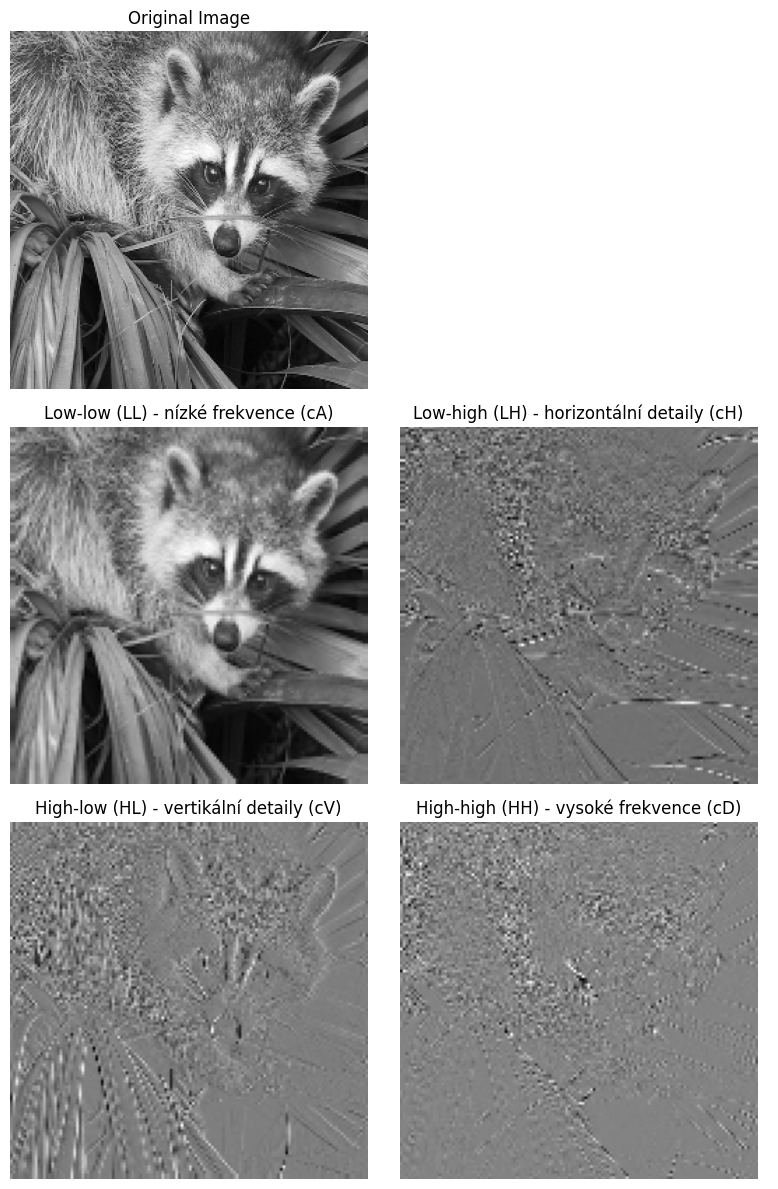

In [352]:
# Waveletová transformace, pywt
import pywt
#import pywt.data

image = img1

# Aplikace diskrétní waveletové transformace
coeffs2 = pywt.dwt2(image, 'bior1.3')  # 'bior1.3' je typ waveletu
LL, (LH, HL, HH) = coeffs2
# cA, (cH, cV, cD)

# Zobrazení spektra koeficientů
fig, axs = plt.subplots(3, 2, figsize=(8, 12))

# Zobrazení původního obrazu
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

axs[0, 1].axis('off')

# Zobrazení koeficientů LL, LH, HL, HH
axs[1, 0].imshow(LL, cmap='gray')
axs[1, 0].set_title("Low-low (LL) - nízké frekvence (cA)")
axs[1, 0].axis('off')

axs[1, 1].imshow(LH, cmap='gray')
axs[1, 1].set_title("Low-high (LH) - horizontální detaily (cH)")
axs[1, 1].axis('off')

axs[2, 0].imshow(HL, cmap='gray')
axs[2, 0].set_title("High-low (HL) - vertikální detaily (cV)")
axs[2, 0].axis('off')

axs[2, 1].imshow(HH, cmap='gray')
axs[2, 1].set_title("High-high (HH) - vysoké frekvence (cD)")
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


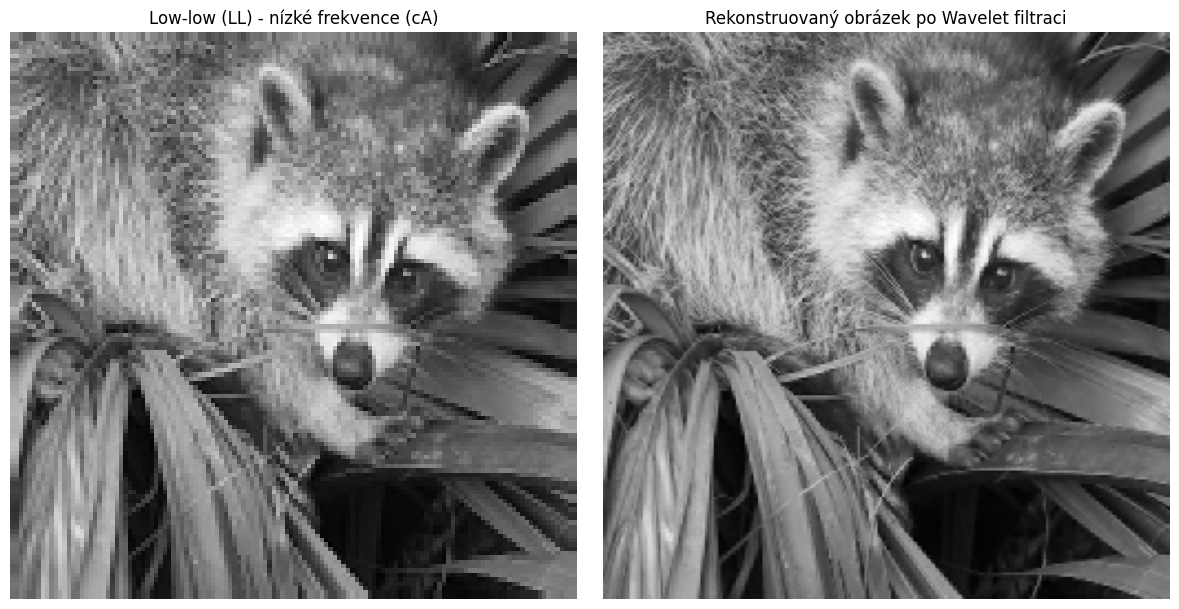

In [353]:
# Aplikace low-pass filtru: Nastavení detailních koeficientů na nulu
import copy
coeffs_copy = copy.deepcopy(coeffs2)
LL, (LH, HL, HH) = coeffs_copy
# Tímto odstraníme vysokofrekvenční detaily z (LH, HL, HH)
LH[:,:] /= 2        # nebo např. = 0
HL[:,:] /= 2
HH[:,:] /= 2

# Rekonstrukce obrazu po aplikaci filtru
coeffs2_filtered = LL, (LH, HL, HH)
img_reconstructed_filtered = pywt.idwt2(coeffs2_filtered, 'bior1.3')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(1, 2, 1)                # 1 řádek, 2 sloupce, první
plt.title("Low-low (LL) - nízké frekvence (cA)")
plt.imshow(LL, cmap="gray")
plt.axis("off")

# Zobrazení rekonstruovaného obrázku
plt.subplot(1, 2, 2)                # 1 řádek, 2 sloupce, druhý
plt.imshow(img_reconstructed_filtered, cmap='gray')
plt.title("Rekonstruovaný obrázek po Wavelet filtraci")
plt.axis('off')
plt.tight_layout()
plt.show()


### Víceúrovňová DWT
DWT2, více aplikací

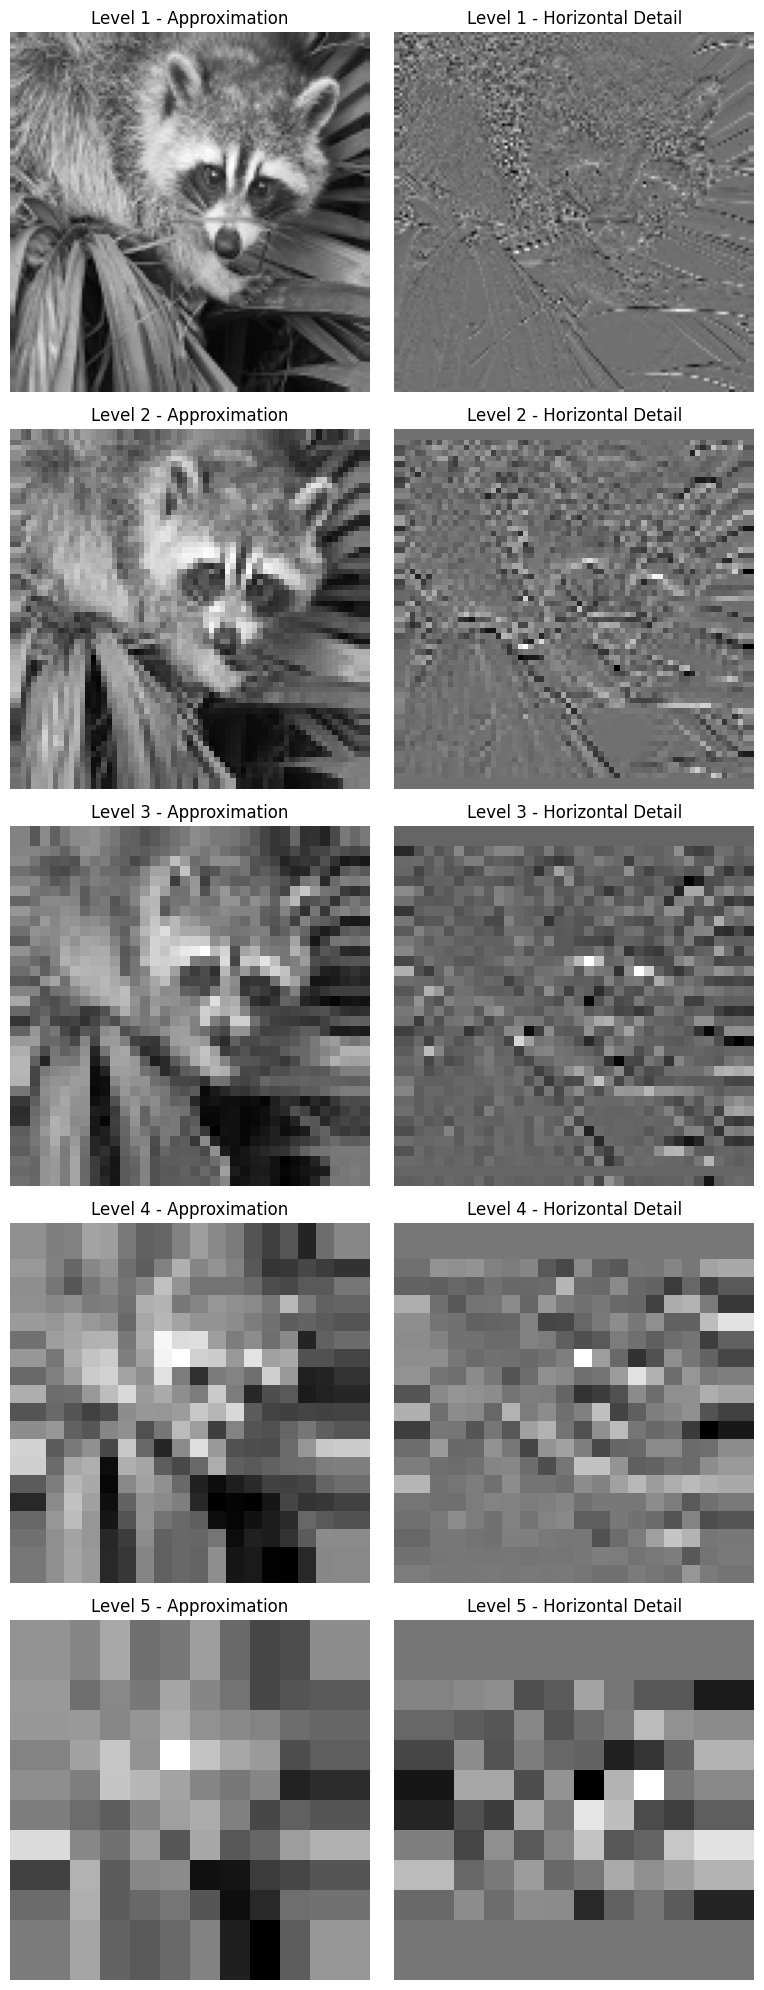

In [354]:
# Waveletová transformace, pywt
import pywt

# Načtení testovacího obrazu
image = img1

# Zvolení waveletu a "hloubky" dekompozice
wavelet_type = 'bior1.3'    # Můžeme změnit na jiný wavelet
max_level = 5               # Maximální úroveň dekompozice

# Aplikace DWT
coeffs = []
current_image = image

# Dekompozice po úrovních
for level in range(max_level):
    coeff = pywt.dwt2(current_image, wavelet_type)
    coeffs.append(coeff)
    current_image = coeff[0]  # Koeficienty nízké frekvence pro další úroveň

# Zobrazení výsledků
fig, axs = plt.subplots(max_level, 2, figsize=(8, 4*max_level))

# Zobrazení původního obrazu
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

for i in range(max_level):
    cA, (cH, cV, cD) = coeffs[i]
    axs[i, 0].imshow(cA, cmap='gray')
    axs[i, 0].set_title(f"Level {i+1} - Approximation")
    axs[i, 0].axis('off')
    
    axs[i, 1].imshow(cH, cmap='gray')
    axs[i, 1].set_title(f"Level {i+1} - Horizontal Detail")
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


#### wavedec2
dekompozice pomocí wavedec2 na více úrovních:
- level 1 nejvíce zjednodušený obraz - výsledek první dekompozice 

- vyšší úrovně obsahují stále jemnější detaily

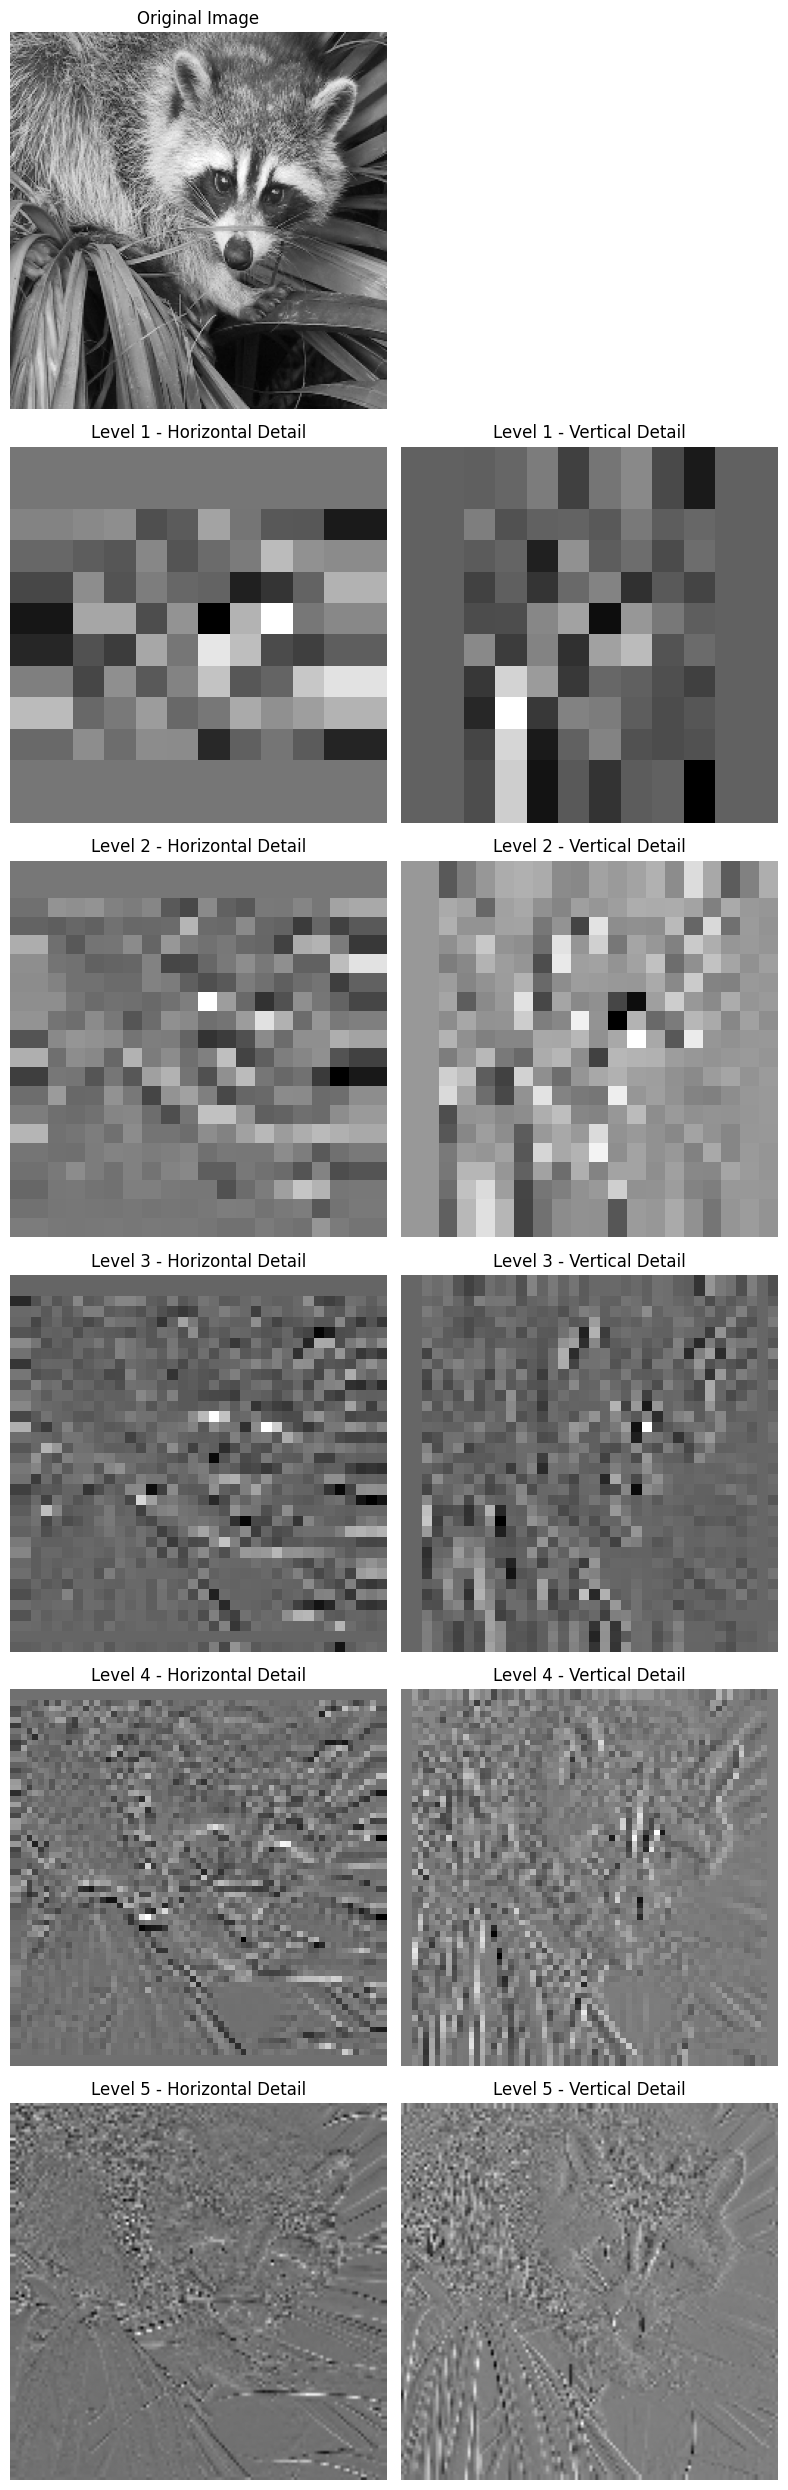

In [355]:
# Waveletová transformace, pywt
import pywt

image = img1

# Parametry DWT: typ waveletu a úroveň dekompozice
wavelet_type = 'bior1.3'  # Můžeš změnit na jiný wavelet
level = 5  # Nastav úroveň dekompozice

# Aplikace DWT s parametry
coeffs = pywt.wavedec2(image, wavelet_type, level=level)

# Zobrazení výsledků
fig, axs = plt.subplots(level + 1, 2, figsize=(8, 5*level))

# Zobrazení původního obrazu
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')
axs[0, 1].axis('off')

# Zobrazení koeficientů pro jednotlivé úrovně
for i in range(level):
    cH, cV, cD = coeffs[i + 1]
    axs[i + 1, 0].imshow(cH, cmap='gray')
    axs[i + 1, 0].set_title(f"Level {i+1} - Horizontal Detail")
    axs[i + 1, 0].axis('off')

    axs[i + 1, 1].imshow(cV, cmap='gray')
    axs[i + 1, 1].set_title(f"Level {i+1} - Vertical Detail")
    axs[i + 1, 1].axis('off')

plt.tight_layout()
plt.show()


## Zpracovnání obrazu

In [357]:
from scipy import ndimage, datasets
import matplotlib.pyplot as plt
import cv2

Geometrické úpravy

In [358]:
face = datasets.face()                          # obrázek mývala 1024 x 768
#face = face[:, :, 0]                           # jen 1 barevný kanál
sample = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY) # stupně šedi
sample = cv2.resize(sample, (150, 150))         # přizpůsobí velikost

samples = [sample]                              # seznam obrázků
titles = ["original"]                           # seznam nadpisů

samples.append(ndimage.shift(sample, (30, 10))) # shora, zdola
titles.append("shift")

samples.append(ndimage.shift(sample, (30, 20), mode='nearest'))
titles.append("shift nearest")

samples.append(ndimage.rotate(sample, 15))      # o 15 stupňů
titles.append("rotate")

samples.append(sample[40:-40, 40:-40])          # 40 pixelů z každé strany
titles.append("crop")

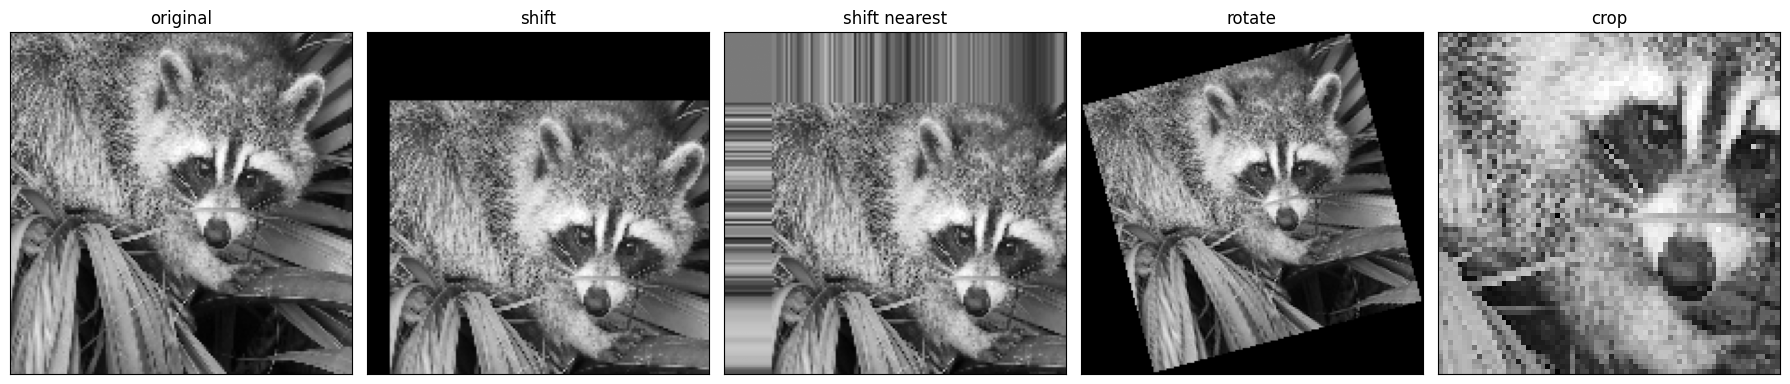

In [359]:
fig, axes = plt.subplots(1, len(samples), figsize=(18,6))
for ax, im, tit in zip(axes, samples, titles):
    ax.imshow(im, cmap=plt.cm.gray)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(tit)
plt.tight_layout()


Odstraňování šumu

In [361]:
from scipy import signal
import numpy as np

noisy_sample = sample.copy().astype(np.float64)
noisy_sample += sample.std() * 0.75 * np.random.standard_normal(sample.shape)

samples = [sample, noisy_sample]
titles = ["original", "noisy"]

samples.append(ndimage.gaussian_filter(noisy_sample, sigma=3))
titles.append("gaussian filter")

samples.append(ndimage.median_filter(noisy_sample, size=5))
titles.append("median filter")

samples.append(signal.wiener(noisy_sample, (5,5)))
titles.append("wiener filter")

In [362]:
fig, axes = plt.subplots(1, len(samples), figsize=(18,6))
for ax, im, tit in zip(axes, samples, titles):
    ax.imshow(im, cmap=plt.cm.gray)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(tit)
plt.tight_layout()
